## **Introduction**
I am Ruixin Chen, a user analysis specialist at a pharmaceutical company. Currently, my company is recruiting paid volunteers for a targeted drug trial for diabetes. I have to analyze past volunteers' health data to identify potential suitable candidates. I have developed a diabetes prediction model1 (using logistic regression), model2(using Random Forest) and then input the information of the individuals I have to predict into model1/model2. The test results are stored as "medicine." Afterward, I submit the list of individuals with a "medicine" result of 1 to the contact department.

## **Dataset Source**

The dataset used in this analysis is publicly available on Kaggle. It includes health metrics for various individuals, which allows for the analysis of factors associated with diabetes risk.

In [98]:
import pandas as pd
url="/content/diabetes.csv"
df=pd.read_csv(url)
df.head(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [99]:
!pip install joblib

In [100]:
import joblib

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
print(df.isnull().sum())
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## **Feature Engineering and Selection**

### Key features in the dataset include:

* Pregnancies
* Glucose
* Blood Pressure
* Skin Thickness
* Insulin
* BMI
* Diabetes Pedigree Function
* Age

To enhance the model’s predictive power, two new features were engineered in our past volunteers' health data:

* Average Blood Pressure: Calculated as the average of systolic and diastolic blood pressure readings ((BPSysAve + BPDiaAve) / 2).
* Age-based Binary Label: Created a binary label to indicate if the age is above 50, as a significant indicator in diabetes risk prediction.

In [103]:
predictor_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[predictor_columns].dropna()
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=predictor_columns)

  * **Logistic Regression (Model1): Logistic regression was selected due to its simplicity, interpretability, and ability to work well with binary classification tasks. It serves as a baseline model for comparison.**

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
C_chosen=[0.01,1,10]
for C in C_chosen:
  model=LogisticRegression(C=C, max_iter=200, random_state=42)
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test, y_pred)
  print(f"Logistic Regression with C={C} Accuracy: {accuracy:.2f}")
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))
  print("Classification Report:")
  print(classification_report(y_test, y_pred))

Logistic Regression with C=0.01 Accuracy: 0.64
Confusion Matrix:
[[99  0]
 [55  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154

Logistic Regression with C=1 Accuracy: 0.77
Confusion Matrix:
[[86 13]
 [23 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        99
           1       0.71      0.58      0.64        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

Logistic Regression with C=10 Accuracy: 0.76
Confusion Matrix:
[[80 19]
 [18 37]]
Classification Report:
              precision    rec

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


* *Logistic Regression: The regularization parameter C was tuned over values [0.01, 1, 10]. C = 1 yielded the best performance.*

In [105]:
best_model=LogisticRegression(C=1, max_iter=200, random_state=42)
best_model.fit(X_train, y_train)
joblib.dump(best_model, 'model1.pkl')

['model1.pkl']

In [106]:
import pandas as pd
file_path1='/content/NHANES_cleaned.csv'
df1=pd.read_csv(file_path1)
df1.head(50)

,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,...,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow
0,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,Married,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
1,51625,2009_10,male,4,0-9,49.0,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,51630,2009_10,female,49,40-49,596.0,White,NaN,Some College,LivePartner,...,No,NaN,Yes,Yes,12.0,10.0,1.0,Yes,Heterosexual,NaN
3,51638,2009_10,male,9,0-9,115.0,White,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51646,2009_10,male,8,0-9,101.0,White,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,51647,2009_10,female,45,40-49,541.0,White,NaN,College Grad,Married,...,No,NaN,No,Yes,13.0,20.0,0.0,Yes,Bisexual,NaN
6,51654,2009_10,male,66,60-69,795.0,White,NaN,Some College,Married,...,NaN,NaN,No,Yes,17.0,15.0,NaN,No,NaN,NaN
7,51656,2009_10,male,58,50-59,707.0,White,NaN,College Grad,Divorced,...,Yes,20.0,Yes,Yes,22.0,7.0,1.0,No,Heterosexual,NaN
8,51657,2009_10,male,54,50-59,654.0,White,NaN,9 - 11th Grade,Married,...,Yes,15.0,Yes,Yes,12.0,100.0,1.0,No,Heterosexual,NaN
9,51659,2009_10,female,10,10-19,123.0,White,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
df1.columns.tolist()

['ID',
 'SurveyYr',
 'Gender',
 'Age',
 'AgeDecade',
 'AgeMonths',
 'Race1',
 'Race3',
 'Education',
 'MaritalStatus',
 'HHIncome',
 'HHIncomeMid',
 'Poverty',
 'HomeRooms',
 'HomeOwn',
 'Work',
 'Weight',
 'Length',
 'HeadCirc',
 'Height',
 'BMI',
 'BMICatUnder20yrs',
 'BMI_WHO',
 'Pulse',
 'BPSysAve',
 'BPDiaAve',
 'BPSys1',
 'BPDia1',
 'BPSys2',
 'BPDia2',
 'BPSys3',
 'BPDia3',
 'Testosterone',
 'DirectChol',
 'TotChol',
 'UrineVol1',
 'UrineFlow1',
 'UrineVol2',
 'UrineFlow2',
 'Diabetes',
 'DiabetesAge',
 'HealthGen',
 'DaysPhysHlthBad',
 'DaysMentHlthBad',
 'LittleInterest',
 'Depressed',
 'nPregnancies',
 'nBabies',
 'Age1stBaby',
 'SleepHrsNight',
 'SleepTrouble',
 'PhysActive',
 'PhysActiveDays',
 'TVHrsDay',
 'CompHrsDay',
 'TVHrsDayChild',
 'CompHrsDayChild',
 'Alcohol12PlusYr',
 'AlcoholDay',
 'AlcoholYear',
 'SmokeNow',
 'Smoke100',
 'Smoke100n',
 'SmokeAge',
 'Marijuana',
 'AgeFirstMarij',
 'RegularMarij',
 'AgeRegMarij',
 'HardDrugs',
 'SexEver',
 'SexAge',
 'SexNumPartn

In [108]:
import pandas as pd
import numpy as np
df_model1=pd.read_csv('/content/diabetes.csv')
mean_values=df_model1[['Glucose', 'Insulin', 'SkinThickness', 'DiabetesPedigreeFunction']].mean()
df1 = df1.rename(columns={
    'nPregnancies':'Pregnancies',
    'BPSysAve':'BPSysAve',
    'BPDiaAve':'BPDiaAve'
})
df1['BloodPressure']=(df1['BPSysAve']+df1['BPDiaAve'])/2
columns=['Glucose', 'Insulin', 'SkinThickness', 'DiabetesPedigreeFunction']
for col in columns:
    if col not in df1.columns:
        df1[col]=np.nan
    df1[col]=df1[col].fillna(mean_values[col])
print(df1[columns].isnull().sum())
print(df1.head())

Glucose                     0
Insulin                     0
SkinThickness               0
DiabetesPedigreeFunction    0
dtype: int64
      ID SurveyYr  Gender  Age AgeDecade  AgeMonths  Race1 Race3  \
0  51624  2009_10    male   34     30-39      409.0  White   NaN   
1  51625  2009_10    male    4       0-9       49.0  Other   NaN   
2  51630  2009_10  female   49     40-49      596.0  White   NaN   
3  51638  2009_10    male    9       0-9      115.0  White   NaN   
4  51646  2009_10    male    8       0-9      101.0  White   NaN   

      Education MaritalStatus  ... SexNumPartnLife  SexNumPartYear  SameSex  \
0   High School       Married  ...             8.0             1.0       No   
1           NaN           NaN  ...             NaN             NaN      NaN   
2  Some College   LivePartner  ...            10.0             1.0      Yes   
3           NaN           NaN  ...             NaN             NaN      NaN   
4           NaN           NaN  ...             NaN             

In [109]:
predictor_columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
df1_clean=df1[predictor_columns].dropna()
predicted_pro=model.predict_proba(df1_clean)[:, 1]
df1_clean['medicine']=(predicted_pro>0.5).astype(int)
df1_clean[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'medicine']].head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,medicine
2,2.0,120.894531,93.5,20.536458,79.799479,30.57,0.471876,49,1
5,1.0,120.894531,91.0,20.536458,79.799479,27.24,0.471876,45,1
16,4.0,120.894531,82.0,20.536458,79.799479,19.73,0.471876,56,1
17,2.0,120.894531,105.5,20.536458,79.799479,20.66,0.471876,57,1
23,6.0,120.894531,97.5,20.536458,79.799479,27.18,0.471876,64,1
27,4.0,120.894531,86.0,20.536458,79.799479,30.60,0.471876,51,1
32,4.0,120.894531,81.0,20.536458,79.799479,21.16,0.471876,37,1
33,1.0,120.894531,86.0,20.536458,79.799479,46.69,0.471876,28,1
45,5.0,120.894531,93.5,20.536458,79.799479,25.52,0.471876,27,1
50,1.0,120.894531,97.5,20.536458,79.799479,28.48,0.471876,56,1


In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

* **Random Forest Classifier (Model2): Random forest, an ensemble method, was chosen for its ability to capture non-linear relationships and interactions between features, which are common in complex medical datasets. Additionally, random forest is robust against overfitting when tuned appropriately.**


In [111]:
df=pd.read_csv('/content/diabetes.csv')
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [112]:
predictor_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[predictor_columns].dropna()
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=predictor_columns)

In [113]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

*Random Forest: Three sets of hyperparameters were tested:*
* n_estimators = 50, max_depth = 5, max_features = 'sqrt'
* n_estimators = 100, max_depth = 10, max_features = 'sqrt'
* n_estimators = 200, max_depth = 15, max_features = 'log2'
The third configuration, n_estimators = 200, max_depth = 15, and max_features = 'log2', provided the best results.

In [114]:
param_grid = [
    {'n_estimators': 50, 'max_depth': 5, 'max_features': 'sqrt'},
    {'n_estimators': 100, 'max_depth': 10, 'max_features': 'sqrt'},
    {'n_estimators': 200, 'max_depth': 15, 'max_features': 'log2'}
]

for params in param_grid:
    model_rf = RandomForestClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        max_features=params['max_features'],
        random_state=42
    )
    model_rf.fit(X_train, y_train)
    y_pred=model_rf.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    print(f"Random Forest with {params} Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

Random Forest with {'n_estimators': 50, 'max_depth': 5, 'max_features': 'sqrt'} Accuracy: 0.76
Confusion Matrix:
[[83 16]
 [21 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

Random Forest with {'n_estimators': 100, 'max_depth': 10, 'max_features': 'sqrt'} Accuracy: 0.75
Confusion Matrix:
[[78 21]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Random Forest with {'n_estimators'

In [115]:
best_models2=RandomForestClassifier(n_estimators=200, max_depth=15, max_features='log2', random_state=42)
best_models2.fit(X_train, y_train)
joblib.dump(best_models2, 'model2.pkl')
print("Successfully saved model2.pkl")

Successfully saved model2.pkl


In [116]:
df_model2=pd.read_csv('/content/diabetes.csv')
mean_values=df_model2[['Glucose', 'Insulin', 'SkinThickness', 'DiabetesPedigreeFunction']].mean()
df2=pd.read_csv('/content/NHANES_cleaned.csv')
df2=df2.rename(columns={
    'nPregnancies': 'Pregnancies',
    'BPSysAve': 'BPSysAve',
    'BPDiaAve': 'BPDiaAve'
})
df2['BloodPressure']=(df2['BPSysAve']+df2['BPDiaAve'])/2
columns_to_fill=['Glucose', 'Insulin', 'SkinThickness', 'DiabetesPedigreeFunction']
for col in columns_to_fill:
    if col not in df2.columns:
        df2[col]=np.nan
    df2[col]=df2[col].fillna(mean_values[col])
print(df2[columns_to_fill].isnull().sum())
print(df2.head())

Glucose                     0
Insulin                     0
SkinThickness               0
DiabetesPedigreeFunction    0
dtype: int64
      ID SurveyYr  Gender  Age AgeDecade  AgeMonths  Race1 Race3  \
0  51624  2009_10    male   34     30-39      409.0  White   NaN   
1  51625  2009_10    male    4       0-9       49.0  Other   NaN   
2  51630  2009_10  female   49     40-49      596.0  White   NaN   
3  51638  2009_10    male    9       0-9      115.0  White   NaN   
4  51646  2009_10    male    8       0-9      101.0  White   NaN   

      Education MaritalStatus  ... SexNumPartnLife  SexNumPartYear  SameSex  \
0   High School       Married  ...             8.0             1.0       No   
1           NaN           NaN  ...             NaN             NaN      NaN   
2  Some College   LivePartner  ...            10.0             1.0      Yes   
3           NaN           NaN  ...             NaN             NaN      NaN   
4           NaN           NaN  ...             NaN             

In [117]:
predictor_columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df2_clean=df2[predictor_columns].dropna()
model2=joblib.load('model2.pkl')
predicted_probabilities_rf=model2.predict_proba(df2_clean)[:, 1]
df2_clean['medicine_rf']=(predicted_probabilities_rf>0.5).astype(int)

In [118]:
df2_clean[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'medicine_rf']].head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,medicine_rf
2,2.0,120.894531,93.5,20.536458,79.799479,30.57,0.471876,49,1
5,1.0,120.894531,91.0,20.536458,79.799479,27.24,0.471876,45,1
16,4.0,120.894531,82.0,20.536458,79.799479,19.73,0.471876,56,1
17,2.0,120.894531,105.5,20.536458,79.799479,20.66,0.471876,57,1
23,6.0,120.894531,97.5,20.536458,79.799479,27.18,0.471876,64,1
27,4.0,120.894531,86.0,20.536458,79.799479,30.60,0.471876,51,1
32,4.0,120.894531,81.0,20.536458,79.799479,21.16,0.471876,37,1
33,1.0,120.894531,86.0,20.536458,79.799479,46.69,0.471876,28,1
45,5.0,120.894531,93.5,20.536458,79.799479,25.52,0.471876,27,1
50,1.0,120.894531,97.5,20.536458,79.799479,28.48,0.471876,56,1


In [119]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [120]:
df=pd.read_csv('/content/diabetes.csv')
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [121]:
predictor_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[predictor_columns].dropna()
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=predictor_columns)

In [122]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
model1=joblib.load('model1.pkl')
model2=joblib.load('model2.pkl')

In [124]:
y_pred_log=model1.predict_proba(X_test)[:, 1]
y_pred_rf=model2.predict_proba(X_test)[:, 1]

In [125]:
y_test

,Outcome
668,0
324,0
624,0
690,0
473,0
...,...
355,1
534,0
344,0
296,1


#### **To assess model performance, ROC-AUC was selected as the primary evaluation metric because it provides a balanced measure of both sensitivity and specificity, critical in a health-related classification model.**

In [126]:
fpr_logreg, tpr_logreg, thresholds_logreg=roc_curve(y_test, y_pred_log)
fpr_rf, tpr_rf, thresholds_rf=roc_curve(y_test, y_pred_rf)

In [127]:
auc_logreg=roc_auc_score(y_test, y_pred_log)
auc_rf=roc_auc_score(y_test, y_pred_rf)

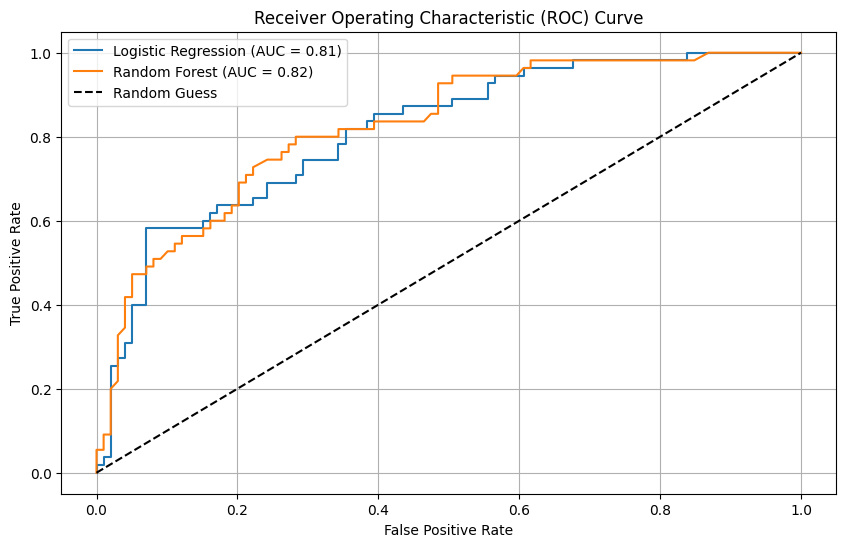

In [128]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

## **Result**
* Model1 (Logistic Regression):
  AUC = 0.81
* Model2 (Random Forest):
  AUC = 0.82

While both models performed reasonably well, the random forest model (Model2) slightly outperformed logistic regression, indicating a stronger ability to capture complex feature interactions.

## **Recommendation**

Model2 (Random Forest) is recommended due to its higher AUC score of 0.82 compared to Model1’s 0.81. Although the difference is small, the increased flexibility of random forests in handling feature interactions may prove beneficial in real-world scenarios, especially when applied to a broader population.


## **Future Work**
* Hyperparameter Optimization: Use grid or random search over a more extensive set of hyperparameters to fine-tune both models further.
* Feature Expansion: Incorporate additional health-related metrics, such as lifestyle and dietary factors, which might provide further predictive value.

## **Conclusion**

The random forest model (Model2) demonstrated a marginally better performance, with an AUC of 0.82 over Model1’s 0.81. Given the application’s goal to identify suitable volunteers for a diabetes trial, the random forest model’s accuracy and ability to handle complex relationships make it a more appropriate choice for the stakeholder’s needs.